
**Your Name**: Ammar Shafi

# In Class Assignment 4
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook) before the end of class. Be sure to save the notebook before uploading!


## Clustering
Please run the following code to create synthetic datasets on a two dimensional plane. Three sets of data are created and saved into variables `X1`, `X2`, and `X3`. Each dataset is plotted afterward. We will be using `scikit-learn` to perform clustering on each dataset. You do not need to understand the specifics of the code in the next block, just know that three datasets are created with two attributes in each dataset (*i.e.*, two columns), and they are saved into variables `X1`, `X2`, and `X3`.

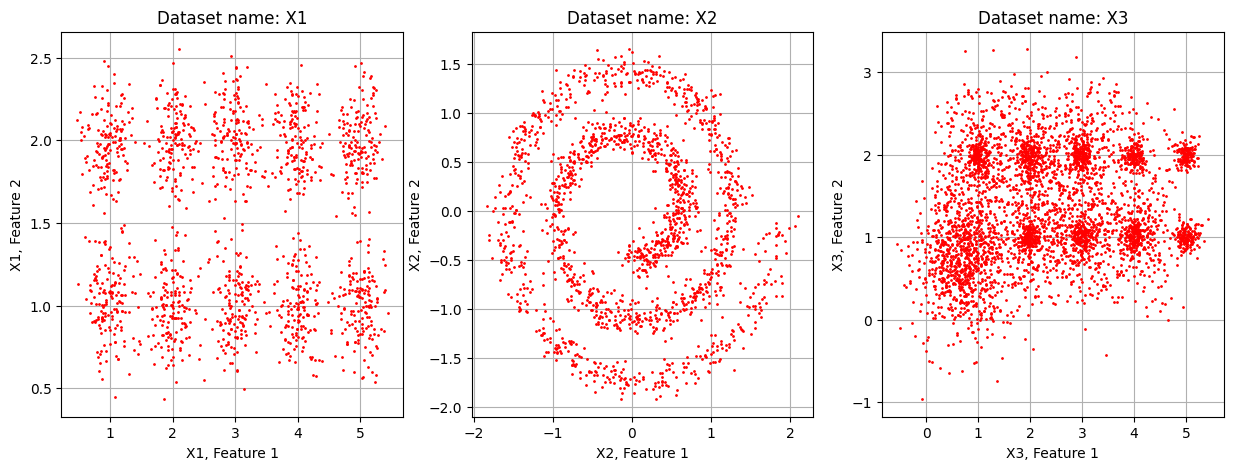

In [1]:
# getting things started
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np


# generate some sample data
n_samples = 1700
np.random.seed(0)

#======= Sample data ONE
cluster_centers = [[1.0,1], [1,2], [2,1], [2,2], [3,1], [3,2], [4,1], [4,2], [5,1], [5,2]]
X1 = np.array(cluster_centers) # cluster prototypes
X1 = np.repeat(X1, 150, axis=0)
X1 += .2 * np.random.randn(X1.shape[0],2) # add some randomness

#====== Sample data TWO
# Generate some harder sample data
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t) / 10.0
y = t * np.sin(t) / 10.0

X2 = np.concatenate((x, y))
X2 += .1 * np.random.randn(2, n_samples) # add some randomness
X2 = X2.T # and transpose it

#====== Sample data THREE
cluster_centers[0] = [0.75,0.75]
cluster_centers.insert(0,[0.75,0.75])
X3 = np.array(cluster_centers) # cluster prototypes
X3 = np.repeat(X3, 150, axis=0)
X3 += .1 * np.random.randn(X3.shape[0],2) # add some randomness
X3[0:300] += .3 * np.random.randn(300,2) # add spread to first class

#Python 3...
n_samples = int(len(X3)/4*3)
#n_samples = len(X3)/4*3
Xtmp1 = X3[0:n_samples] + .4 * np.random.randn(n_samples,2) # create some spread in the points
Xtmp2 = X3[0:n_samples] + .4 * np.random.randn(n_samples,2) # create some spread in the points
X3 = np.concatenate((X3,Xtmp1,Xtmp2)) # and add them back in for differing density

# now plot each dataset
plt.figure(figsize=(15,5))
for i,X in enumerate([X1,X2,X3]):
    plt.subplot(1,3,i+1)
    plt.plot(X[:, 0], X[:, 1], 'r.', markersize=2) #plot the data
    plt.title('Dataset name: X{0}'.format(i+1))
    plt.xlabel('X{0}, Feature 1'.format(i+1))
    plt.ylabel('X{0}, Feature 2'.format(i+1))
    plt.grid()

plt.show()

**Question 1**: For each dataset, is it:
- best described as center-based, contiguous, or density based (or a mix of more than one)?
- best described as partitional or hierarchical?  

**Question 2**: Given the plots above for each dataset, what type of clustering algorithm would you consider using for each and why? That is, give your opinion on whether k-means, hierarchical agglomerative, and/or DBSCAN are appropriate for each dataset.


Enter your answers to Questions 1 & 2 here:

*Double Click to Edit*

Question 1:
X1 shows separated, compact clusters in a grid, Which could be likely described as a clustering. Because the structure is clean and symmetrical, it would be fair to assume that it is paritional.
X2 shows concentric bands which could be seen as hierarchical. The "clusters" in this case also seem to be contiguous in nature.
X3 contains a mix of clusters and desnsities, with a dense core and scattered blobs. This would mean some center based and some density based, and because of these different densities we would want a hierachical method.

Question 2:
For X1, k-means or hierarchical agglomerative clustering because the clusters are compact, equally sized, and have clear centroids. 
X2 is best clustered using DBSCAN because the ring shapes are centroid-based therefore methods like k-means would likely misclassify them.
X3 should use hierarchical method, as the clusters vary in density and shape. DB scan would fail to capture both the dense and sparse regions, and kmean would probably overfit the dense cluster.


## Kmeans Clustering in Scikit
Now lets look at calculations in K-Means clustering with `scikit-learn` and see if we can calculate the difference between two different clusterings. Lets start by using k-means clustering on the first dataset. The code is given for you below as well as code for plotting the centroids, as shown. Take a look to see how k-means is run.

You can also see the documentation for k-means here:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

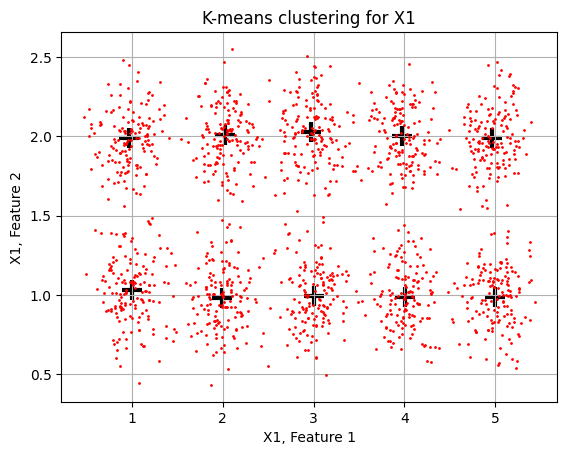

In [29]:
from sklearn.cluster import KMeans

# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(init='random', # initialization k-means++ or random
        n_clusters=10,  # number of clusters
        n_init=3)     # number of different times to run k-means


kmeans.fit(X1)

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(X1[:, 0], X1[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()

**Question 3**:

a)  Is the above a good clustering of the data? Why or why not?

b) Run the block of code a few times. Did the results ever improve? Is the clustering consistent?

c) How might we make the clustering more consistent in finding the optimal clustering (i.e., the clustering with the smallest SSE)?

Enter your answer here:

*Double Click to Edit*

A: Yes. The dataset consists of ten, roughly spherical blobs, and the ten black “+” symbols are at the visual centers of those dense blobs. Because each point is closest to its own centroid and far from the others, the error is likely to be minimal to zero.

B: The results didn't really improve, but the clustering was overall consistent. The only issue that arose was that sometimes a new cluster would appear in between two dense clusters.

C: We can raise the n_init value to a higher number, in  ofrder to give more independent tries at the KNN and select the best model. We could also perform a grid search with many different paramters/cluster counts to see which one performs the best. Also setting a random seed could help with reproducibility.


## K-means consistency
**Question 4**: Now let's try to make the kmeans clustering more consistent. Change the `n_init` and `init` parameters of kmeans such that (almost) every time you run the block of code, the optimal clustering is found. Make sure that the solution you find is as *efficient as possible*.

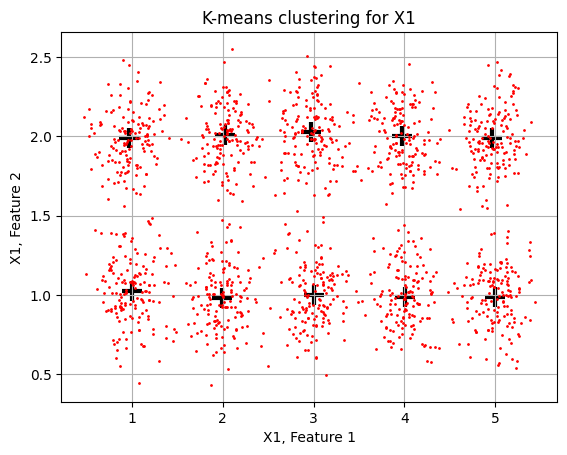

In [ ]:
from sklearn.cluster import KMeans

#--------Change parameters below this line---------------------------
# CHANGE THE PARAMETERS HERE TO GET A CONSISTENTLY OPTIMAL CLUSTERING
# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(
    init='k-means++',    # initialization
    n_clusters=10,    # number of clusters
    n_init=2)         # number of different times to run k-means
#It looks like 2 was all we needed because I've ran this code 30 times and it only "failed" once
#--------Change parameters above this line---------------------------

kmeans.fit(X1)

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(X1[:, 0], X1[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()

## Mini-batching for better performance
Traditional Kmeans uses a "Batch" approach where each point is looked at for every iteration. By incrementally updating the centroids in the space, we can get a more efficient way of finding the centroids without visiting every point in the dataset at each iteration. We talked about this in the video lecture and it was called "Mini-Batch Kmeans." The following code will run both kmeans and mini-batch kmeans using `scikit-learn`'s implementations. The mini-batch size is set currently to ten instances. Each algorithm is timed for each run and the times are shown after the block of code (I am using the `%time` magics for ipython). Answer the questions that follow this block of code.


Time for BatchKMeans:
CPU times: total: 203 ms
Wall time: 33.1 ms
Time for MiniBatchKMeans:
CPU times: total: 3.06 s
Wall time: 445 ms


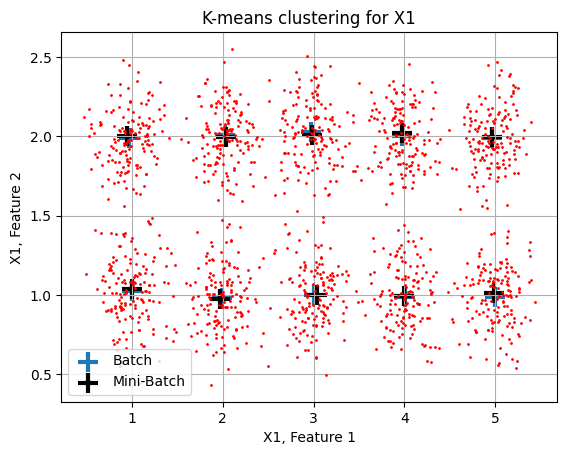

In [64]:
from sklearn.cluster import MiniBatchKMeans

kmeans_mini = MiniBatchKMeans(n_clusters=10, batch_size=10) # note the use of the n_init arguement - Future Warning
kmeans = KMeans(n_clusters=10)

print('Time for BatchKMeans:')
%time kmeans.fit(X1)
print('Time for MiniBatchKMeans:')
%time kmeans_mini.fit(X1)


# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(X1[:, 0], X1[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, label='Batch')  # plot the centroids

centroids = kmeans_mini.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k',label='Mini-Batch')  # plot the centroids
plt.legend()
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()

**Question 5**:

a) Is mini-batch faster than kmeans for this example? Does this make sense to you? Why or why not?

b)  Are the results comparable to one another?

c) To compare the results mathematically, what objective function would you use?

d) Does `scikit-learn`'s implementation have a property in the fitted object for getting the value of this objective function?

e) If so, compare the objective function value for the `kmeans` object and the `kmeans_mini` object. Which is better?


Enter your answer here:

*Double Click to Edit*
A: In this trial MiniBatchKMeans is slower than full-batch KMeans (≈ 445 ms wall-time versus ≈ 33 ms). This makes sense because we used a batch_size of only 10, so the algorithm performs hundreds of very small updates and the Python/NumPy overhead starts to add up.

B: Yes, they are basically overlapping with eachother with marginal variation at best.

C: We would have to look at the within cluster sum of squares error AKA inertia in sci kit learn

D: Yes, it is found by doing kmeans.inertia and kmeans_mini.inertia

E: 
Batch objective function value: 109.87509274288412

Mini-Batch objective function value: 110.49733091936324

Here we can see that the full batch is slight lower than the mini batch, meaning that it has overall less error and is more "accurate"
Enter any calculations needed below:

In [65]:
# Use this space for any calculations you may want to perform for the objective function

print('Batch objective function value:', kmeans.inertia_)
print('Mini-Batch objective function value:', kmeans_mini.inertia_)

Batch objective function value: 109.87509274288412
Mini-Batch objective function value: 110.49733091936324


## DBSCAN
Now lets use the remaining datasets to investigate the use of DBSCAN clustering. As a reminder, this is what the two datasets look like:

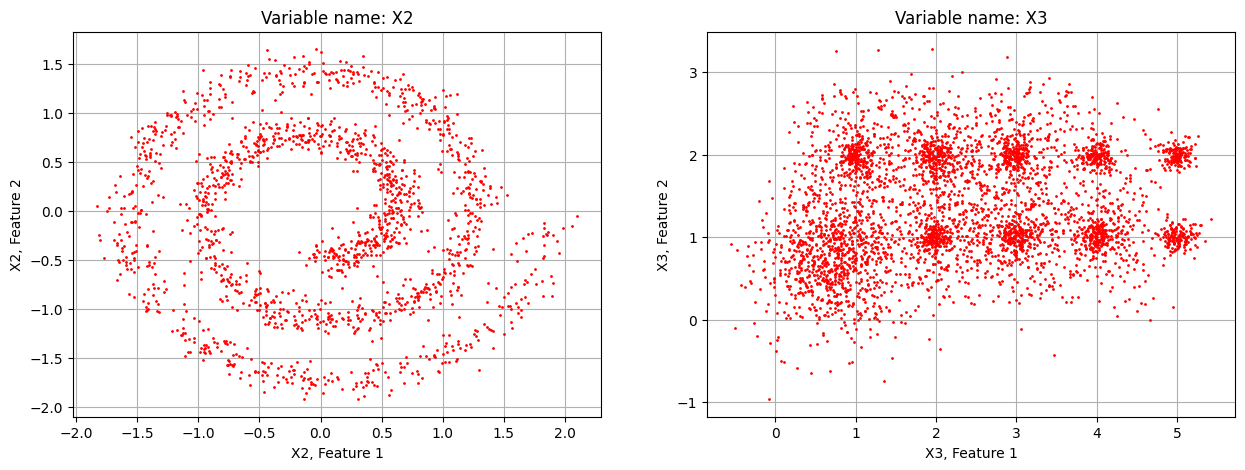

In [66]:
from sklearn.cluster import DBSCAN

# now plot each dataset
plt.figure(figsize=(15,5))
for i,X in enumerate([X2,X3]):
    plt.subplot(1,2,i+1)
    plt.plot(X[:, 0], X[:, 1], 'r.', markersize=2) #plot the data
    plt.title('Variable name: X{0}'.format(i+2))
    plt.xlabel('X{0}, Feature 1'.format(i+2))
    plt.ylabel('X{0}, Feature 2'.format(i+2))
    plt.grid()

plt.show()


Recall that with DBSCAN, we need to set the values for eps and for MinPts to create core points, border points, and noise points.

**Question 6**: Can you come up with a reasonable value for *eps* and *MinPts* from the above graphs? What are your guesses and why did you choose them?
  


Enter your answer here:

X2:

eps: 0.12-0.15, because we have such distinct empty regions and we can try and focus on capturing the ring's local densities without crossing over into the other one.

minPts. ~20, these small clusters should help keep the noise to a minimum while still allowing for good clustering.

X3:

eps: 0.15, this will help us reveal the dense blobs while also noot being low enough to fragment the data to too small of clusters.
minPts: 10 because we have very dense *and* very sparse clusters, we would want to keep a low pts count to prevent these small clusters from being considered noise.

*Double Click to Edit*



Now, let's investigate the value of MinPts and eps for the given datasets by graphing out the distances to the $N^{th}$ nearest neighbors (as we did at the end of the lecture video). This example sets N=4, but you can change it to be whatever value you think is reasonable from above. You can also try changing the value to find a better graph.

The code below will calculate and graph the distances to the $N^{th}$ nearest neighbors for each dataset (the variable names are `X2_N` and `X3_N`).

**Question 7**: Investigate the graphs at the end and choose a value of MinPts and Eps for each dataset.  What is the value of Eps and MinPts and why do you think it will work given these graphs?

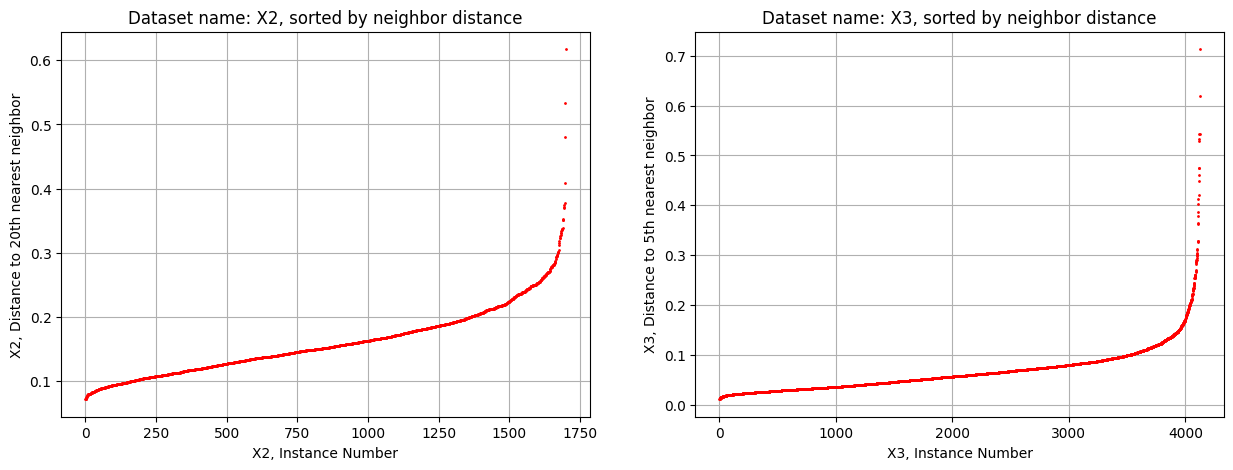

In [70]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

#=======================================================
# CHANGE THESE VALUES TO ADJUST MINPTS FOR EACH DATASET
X2_N = 20
X3_N = 5
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X2_knn_graph = kneighbors_graph(X2, X2_N, mode='distance') # calculate distance to four nearest neighbors
X3_knn_graph = kneighbors_graph(X3, X3_N, mode='distance') # calculate distance to four nearest neighbors

N2 = X2_knn_graph.shape[0]
X2_4nn_distances = np.zeros((N2,1))
for i in range(N2):
    X2_4nn_distances[i] = X2_knn_graph[i,:].max()

X2_4nn_distances = np.sort(X2_4nn_distances, axis=0)

N3 = X3_knn_graph.shape[0]
X3_4nn_distances = np.zeros((N3,1))
for i in range(N3):
    X3_4nn_distances[i] = X3_knn_graph[i,:].max()

X3_4nn_distances = np.sort(X3_4nn_distances, axis=0)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N2), X2_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X2, sorted by neighbor distance')
plt.xlabel('X2, Instance Number')
plt.ylabel('X2, Distance to {0}th nearest neighbor'.format(X2_N))
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(N3), X3_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X3, sorted by neighbor distance')
plt.xlabel('X3, Instance Number')
plt.ylabel('X3, Distance to {0}th nearest neighbor'.format(X3_N))
plt.grid()

plt.show()


Enter your answer here:

X2: There seems to be a good elbow at around 0.22 for this graph at min samples 20, leading this to be a fairly good set of params for capturing both rings while filtering noise

X3: There is a really good elbow at 0.13 at min samples = 5; The curve is really smooth and is easily interpretable. 
*Double Click to Edit*




___
## DBSCAN testing eps and minpts
Now test your values of eps from the above question for each dataset. The code below will train and plot clusters with the given parameters.

 **Question 8 (extra)**: Enter your chosen MinPts and Eps parameters for each dataset and analyze the output.
- Do the parameters you chose for these datasets end up with valid clusterings? Why or why not?
- What range of parameters would give valid clusterings for each dataset?

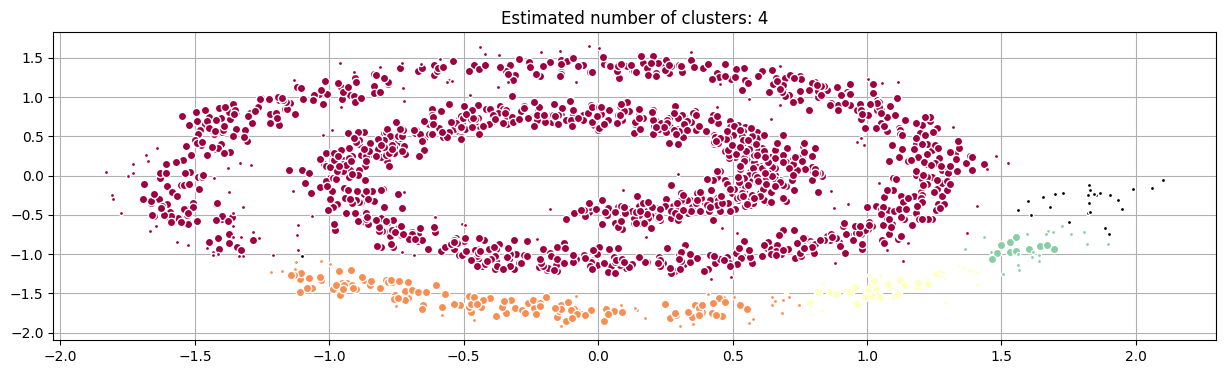

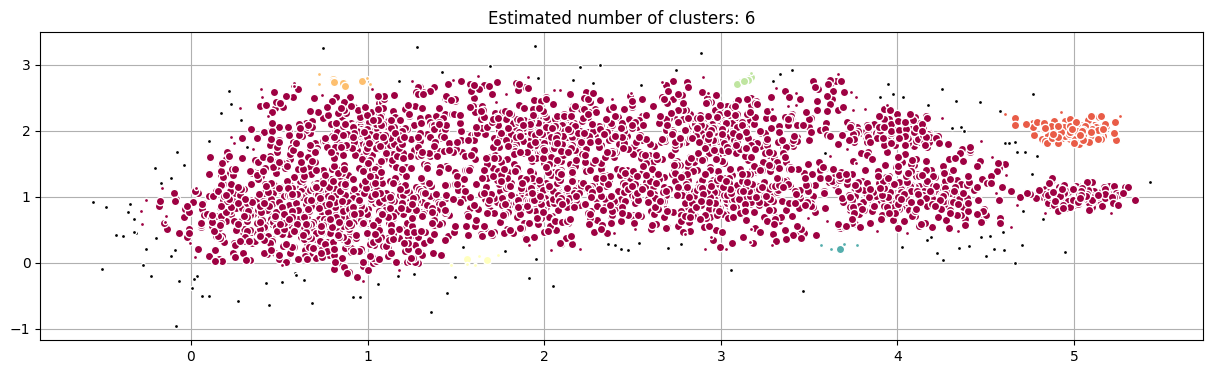

In [73]:
from sklearn.cluster import DBSCAN

#=====================================
# ENTER YOUR CODE HERE TO CHANGE MINPTS AND EPS FOR EACH DATASET
X2_minpts = X2_N # from above
X2_eps = 0.22
X3_minpts = X3_N # from above
X3_eps = 0.13
#=====================================

for i, (data, minpts, eps) in enumerate(zip([X2,X3],[X2_minpts,X3_minpts],[X2_eps,X3_eps])):

    db = DBSCAN(eps=eps, min_samples=minpts).fit(data)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # mark the samples that are considered "core"
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    plt.figure(figsize=(15,4))
    unique_labels = set(labels) # the unique labels
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        # plot the core points in this class
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=6)

        # plot the remaining points that are edge points
        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='w', markersize=3)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.grid()
    plt.show()


Enter your answer here:

X2: DBSCAN returned 4 clusters, meaning each ring should have gotten split into two arcs. With min_samples this high, gaps caused by random scatterings broke any density continuity and the algorithm decided those sectors belong to different clusters. The result ended up being over-fragmented rather than the desired two-ring solution.

X3: DBSCAN returned 6 clusters with a high amount of noise. The tight eps captured only the densest of cores; sparser peripheral blobs never reached five neighbours within 0.13, so they stayed separated or ended up becoming noise. We got a partial but not complete recovery of the actual structure.
*Double Click to Edit*






That's all! Please **upload your rendered notebook** and please include **team member names** in the notebook submission.